In [ ]:
"""
Read and plot ComptonSoft data file
Aur: Jiancheng Zeng
Date: Oct 5, 2023
"""

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


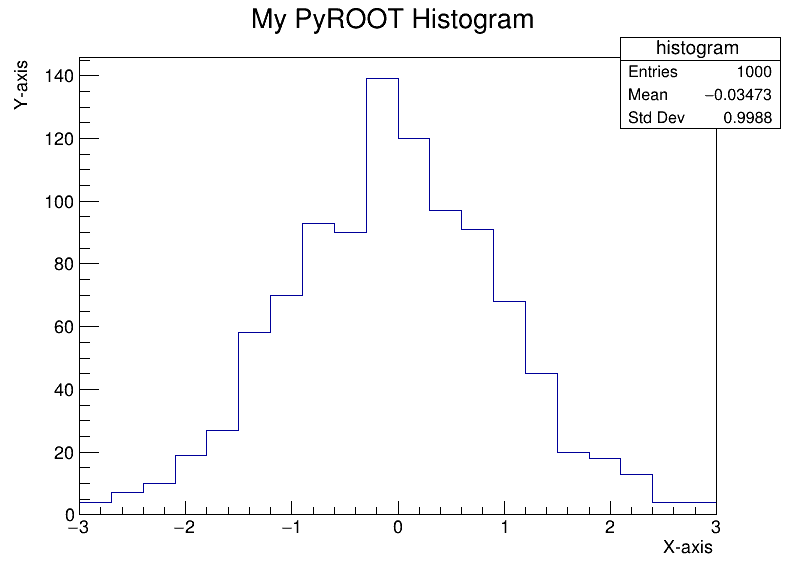

In [3]:
import ROOT
import numpy as np
from ROOT import TCanvas, TH1F

# Initialize the PyROOT environment
ROOT.gROOT.Reset()

# Create some sample data
data = np.random.normal(0, 1, 1000)  # Generate 1000 random numbers with a mean of 0 and standard deviation of 1

# Create a TH1F (1D histogram) to hold the data
histogram = TH1F("histogram", "My Histogram", 20, -3, 3)  # 20 bins from -3 to 3

# Fill the histogram with the sample data
for value in data:
    histogram.Fill(value)

# Create a canvas to draw the histogram
canvas = TCanvas("canvas", "PyROOT Histogram", 800, 600)

# Customize the appearance of the histogram
histogram.SetTitle("My PyROOT Histogram")
histogram.GetXaxis().SetTitle("X-axis")
histogram.GetYaxis().SetTitle("Y-axis")

# Draw the histogram on the canvas
histogram.Draw()

# Show the canvas in the Jupyter Notebook
from ROOT import gROOT
gROOT.GetListOfCanvases().Draw()


In [54]:
import ROOT

# Open the ROOT file for reading
file = ROOT.TFile.Open("ComptonSoft_testdata.root", "READ")

# Print the list of objects in the file
file.ls()

# Get the TTree from the file
tree = file.Get("hittree")

# Replace "your_branch_name" with the name of the TBranch you want to access
branch = tree.GetBranch("ihit")

ihit_data = ROOT.std.vector("int")()
# Set the TBranch address to the buffer
branch.SetAddress(ihit_data)
# Loop through the entries
for entry in tree:
    branch.GetEntry(entry)
    
    # Access and work with the ihit_data vector
    for value in ihit_data:
        print("ihit Value:", value)

# Close the ROOT file when done
file.Close()

TypeError: int TBranch::GetEntry(Long64_t entry = 0, int getall = 0) =>
    TypeError: could not convert argument 1 ('TTree' object cannot be interpreted as an integer)

TFile**		ComptonSoft_testdata.root	
 TFile*		ComptonSoft_testdata.root	
  KEY: TTree	hittree;1	hittree


In [39]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

# Initialize the PyROOT environment
ROOT.gROOT.Reset()

# Open the ROOT file containing the TTree
file = ROOT.TFile.Open("./ComptonSoft_testdata.root", "READ")

# Get the TTree from the file
tree = file.Get("hittree")  # Replace "your_tree_name" with the actual TTree name

# Access the TBranch you want to plot
tbranch = tree.GetBranch("ihit")  # Replace "your_tbranch_name" with the actual TBranch name

# Create an empty list to store the data
data_list = []

# Loop through the entries and fill the list
for entry in tree:
    # Create a buffer to store the TBranch data
    data = np.zeros(1, dtype=float)  # Assuming the data is of type float; adjust as needed

    # Set the TBranch address to the buffer
    tbranch.SetAddress(data)

    # Get the TBranch data
    tbranch.GetEntry(entry)

    # Append the data to the list
    data_list.append(data[0])

# Close the ROOT file when you're done
file.Close()

# Create a histogram using matplotlib
plt.figure(figsize=(8, 6))
plt.hist(data_list, bins=20, range=(-3, 3), color='b', alpha=0.7, label='Data')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Your Histogram Title')
plt.legend()
plt.grid(True)
plt.show()


TypeError: int TBranch::GetEntry(Long64_t entry = 0, int getall = 0) =>
    TypeError: could not convert argument 1 ('TTree' object cannot be interpreted as an integer)